In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

COLORS = {'light_orange': '#E69F00',
 'light_blue': '#56B4E9',
 'teal': '#009E73',
 'yellow': '#F0E442',
 'dark_blue': '#0072B2',
 'dark_orange': '#D55E00',
 'pink': '#CC79A7',
 'purple': '#9370DB',
 'black': '#000000',
 'silver': '#DCDCDC'}

In [2]:
data, labels = make_blobs(n_samples=100, centers=3, n_features=2,random_state=0)

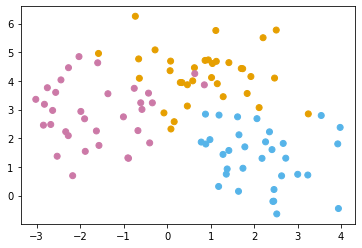

In [161]:
cmap = {0:COLORS["light_orange"],
     1:COLORS["light_blue"],
     2:COLORS["pink"]}

c = [cmap[y] for y in labels]

plt.scatter(data[:,0],data[:,1], c = c)
plt.show()

SpectralClustering(n_clusters=3)

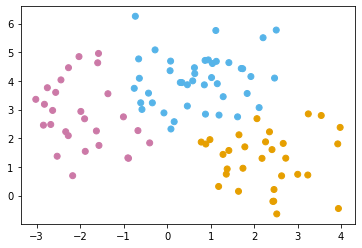

In [163]:
c = [cmap[y] for y in sc.labels_]
plt.scatter(data[:,0],data[:,1], c = c)
plt.show()

In [168]:
# Use radial basis function to compute affinity matrix
distance = np.zeros((data.shape[0], data.shape[0]))
for i in range(distance.shape[0]):
    for j in range(distance.shape[1]):
        distance[i,j] = sum((data[i] - data[j]) ** 2)
        
epsilon = .1
affinity = np.exp(-epsilon*distance**2)

In [169]:
# Use inverse transform to build adjacency matrix
A = np.zeros((data.shape[0], data.shape[0]))
for i in range(distance.shape[0]):
    for j in range(i+1,distance.shape[1]):
        u = np.random.uniform(0,1)
        if u < affinity[i,j]:
            A[i,j] = 1
            A[j,i] = 1

In [170]:
# Compute degree matrix.
D = np.zeros((data.shape[0], data.shape[0]))
for i in range(distance.shape[0]):
    D[i,i] = np.sum(A[i,:])

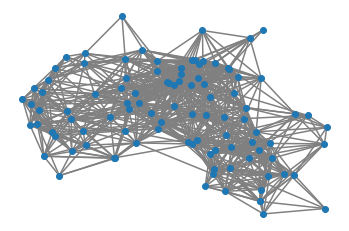

In [171]:
# Plot graph
for i in range(distance.shape[0]):
    for j in range(i+1,distance.shape[1]):
        if A[i,j] == 1:
            plt.plot(data[[i,j],0],data[[i,j],1], color = "grey", zorder = 0)
plt.scatter(data[:,0],data[:,1])
plt.axis("off")
plt.show()

In [172]:
# Compute graph Laplacian
L = D - A

In [173]:
# Compute eigen decomposition
vals, vecs = np.linalg.eig(L)

# Sort values and vectors.
idx = vals.argsort()[::-1]  
vals = vals[idx]
vecs = vecs[:,idx]

In [174]:
# Print components of Fiedler vector
for v in vecs[:,-2]:
    print(v)

0.14690205738727932
-0.03871404819338155
0.15071411061762055
-0.05231865823864663
-0.01930362761953758
-0.022932722544191944
-0.13840083063764563
-0.05057304846164674
0.13631277420817406
-0.020468031369633335
-0.007903064037382964
-0.014422117666470708
0.21651753504074178
-0.02893699860005164
-0.13575105305157864
0.15603953656446778
-0.09565022573325063
-0.0037378570000581464
-0.09362095142471868
-0.13808388401451996
-0.16860868760939965
-0.12358349744675177
-0.11966818063420354
-0.016613709771126896
0.05585666330514808
0.1161739703792877
0.10378657442198234
0.05809994789301711
-0.10288868866758774
-0.06243034315940881
-0.01741111493230078
0.11554547915270556
0.14679425720555905
0.014146932954869773
-0.11145078412586974
-0.010030424898131905
-0.016632538289880743
0.11933601166982412
0.12288759249576423
-0.1240252878512434
-0.041397895725176416
0.15969234173888494
0.09780529244211174
-0.10110123374079215
-0.012841325669890304
-0.028253900467603992
0.15439729012599837
0.12278353104023605

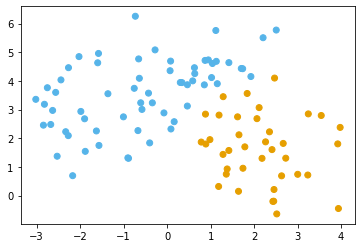

In [175]:
# Print components of Fiedler vector
fiedler_labels = []
for v in vecs[:,-2]:
    if v > 0:
        fiedler_labels.append(0)
    else:
        fiedler_labels.append(1)
        
# Plot output
c = [cmap[y] for y in fiedler_labels]
plt.scatter(data[:,0],data[:,1], c = c)
plt.show()

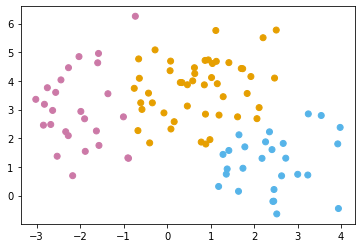

In [192]:
# Do K-means clustering on the first k-eigenvectors.

from sklearn.cluster import KMeans

V = vecs[:,-2:] #each row corresponds to a data point.

# Fit kmeans clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(V)
kmeans_labels = kmeans.labels_

# Plot output
c = [cmap[y] for y in kmeans_labels]
plt.scatter(data[:,0],data[:,1], c = c)
plt.show()

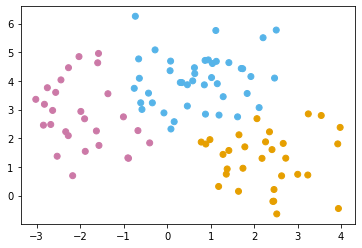

In [195]:
# ...Or use the built in package.

sc = SpectralClustering(n_clusters=3, affinity = "rbf",assign_labels='kmeans')
sc.fit(data)

sklearn_labels = sc.labels_
# Plot output
c = [cmap[y] for y in sklearn_labels]
plt.scatter(data[:,0],data[:,1], c = c)
plt.show()

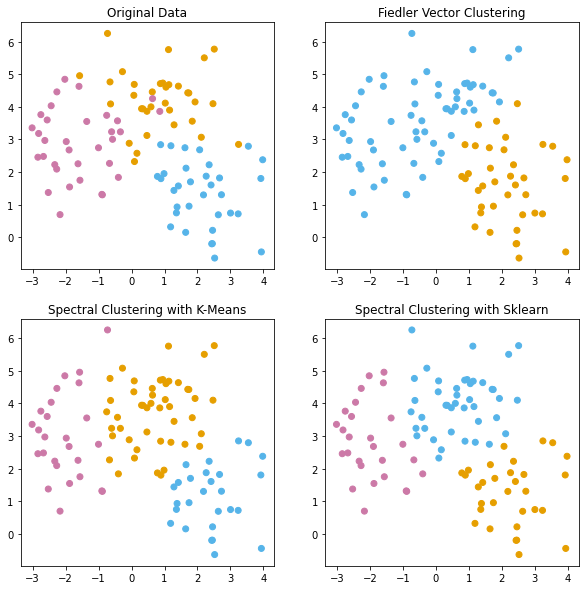

In [210]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

c = [cmap[y] for y in labels]
ax[0,0].scatter(data[:,0],data[:,1], c = c)
ax[0,0].set_title("Original Data")

c = [cmap[y] for y in fiedler_labels]
ax[0,1].scatter(data[:,0],data[:,1], c = c)
ax[0,1].set_title("Fiedler Vector Clustering")

c = [cmap[y] for y in kmeans_labels]
ax[1,0].scatter(data[:,0],data[:,1], c = c)
ax[1,0].set_title("Spectral Clustering with K-Means")

c = [cmap[y] for y in sklearn_labels]
ax[1,1].scatter(data[:,0],data[:,1], c = c)
ax[1,1].set_title("Spectral Clustering with Sklearn")

plt.show()